# First reprojection of 2023-10-12 first HRT magnetogram

In [1]:
from reproject_funcs import *

/scratch/slam/sinjan/.conda/envs/py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
import numpy as np 
from astropy.io import fits
import matplotlib.pyplot as plt
import sunpy
import sunpy.map
import _pickle as cPickle

/scratch/slam/sinjan/.conda/envs/py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
font = {'family' : 'Open Sans',
        'weight' : 'normal',
        'size'   : 15}

import matplotlib as mpl
mpl.rc_file_defaults()
plt.rc('font', **font)
mpl.rcParams['image.origin'] = 'lower'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

import sunpy.visualization.colormaps as cm
magmap = mpl.colormaps['hmimag']

In [4]:
hrt_dir='/data/solo/phi/data/fmdb/public/l2/2023-10-12/'
hmi_blos_45_dir='/data/slam/sinjan/arlongterm_hmi/blos_45/'
hmi_ic_45_dir='/data/slam/sinjan/arlongterm_hmi/ic_45/'
hmi_blos_720_dir='/data/slam/sinjan/arlongterm_hmi/blos_720/'
hmi_ic_720_dir='/data/slam/sinjan/arlongterm_hmi/ic_720/'

## HRT Blos and HMI 45s Blos

In [12]:
hrt_file=hrt_dir+'solo_L2_phi-hrt-blos_20231012T001503_V202408291137_0350120601.fits.gz'

In [13]:
hrt_data=fits.getdata(hrt_file)

In [15]:
hmi_file=hmi_blos_45_dir+'hmi.m_45s.20231012_002145_TAI.2.magnetogram.fits'

In [15]:
hmi_map=sunpy.map.Map(hmi_file).rotate()

In [20]:
hpc_coords = sunpy.map.all_coordinates_from_map(hmi_map)

In [23]:
mask = ~sunpy.map.coordinate_is_on_solar_disk(hpc_coords)

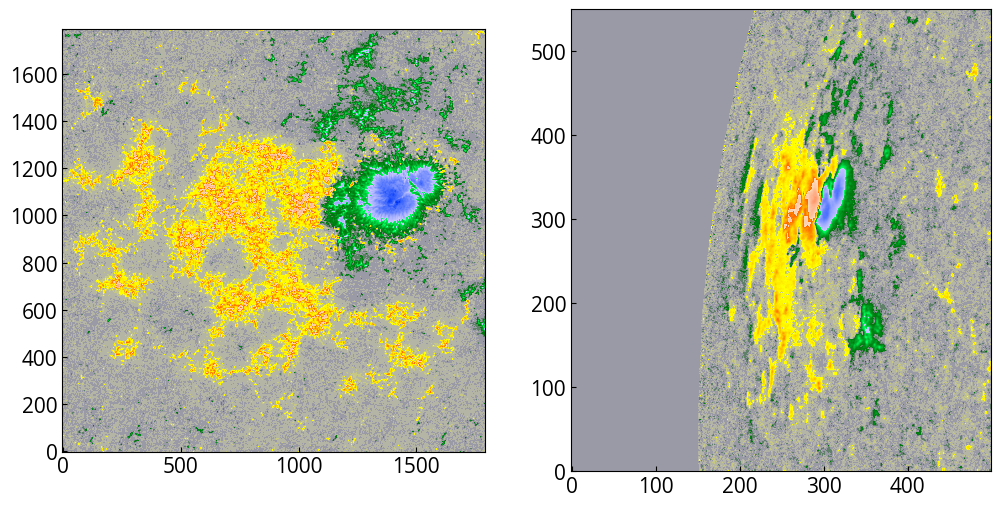

In [57]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(hrt_data,origin="lower",cmap=magmap,vmin=-2000,vmax=2000)

plt.subplot(122)
hmi_map.data[np.isnan(hmi_map.data)]=0
plt.imshow(hmi_map.data[2000:2550,:500]*~mask[2000:2550,:500],origin="lower",cmap=magmap,vmin=-2000,vmax=2000)
#plt.colorbar()

plt.show()

In [31]:
hmi_area=hmi_map.data[2000:2550,:500]*~mask[2000:2550,:500]
np.max(hmi_area)

np.float64(1057.718088015554)

In [32]:
np.max(hrt_data)

np.float32(1661.4968)

In [33]:
1057/0.38

2781.578947368421

In [34]:
out = get_hmi_hrt_aligned(hrt_file,hmi_file)
#[np.int64(227), np.int64(-50)]

/data/solo/phi/data/fmdb/public/l2/2023-10-12/solo_L2_phi-hrt-blos_20231012T001503_V202408291137_0350120601.fits.gz
/data/slam/sinjan/arlongterm_hmi/blos_45/hmi.m_45s.20231012_002145_TAI.2.magnetogram.fits


[np.int64(227), np.int64(-50)]
2024-09-24 16:22:34.932124
2024-09-24 16:35:28.398011


In [39]:
hrt_header=fits.open(hrt_file)[0].header
hrt_header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 1792 / number of pixels on the x axis                 
NAXIS2  =                 1792 / number of pixels on the y axis                 
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
LONGSTRN= 'OGIP 1.0'           / The HEASARC Long String Convention may be used.
COMMENT   This FITS file may contain long string keyword values that are        
COMMENT   continued over multiple keywords.  The HEASARC convention uses the &  
COMMENT   character at the end of each substring which is then continued        
COMMENT   on the next keywor

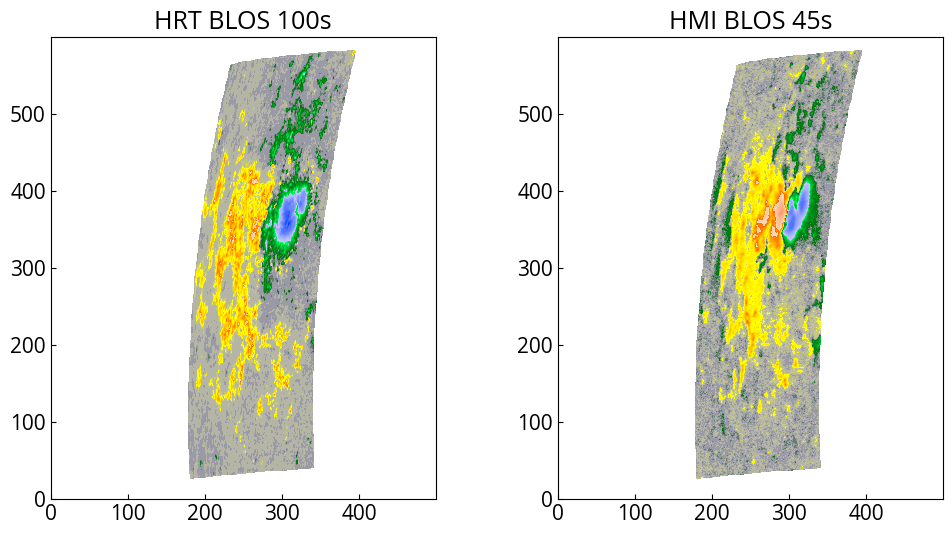

In [65]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(out[0].data[1950:2550,:500],origin="lower",cmap=magmap,vmin=-2000,vmax=2000)
plt.title('HRT BLOS 100s')

plt.subplot(122)
out[1].data[np.isnan(out[0].data)]=np.nan
plt.imshow(out[1].data[1950:2550,:500],origin="lower",cmap=magmap,vmin=-2000,vmax=2000)
plt.title('HMI BLOS 45s')
#plt.colorbar()

plt.show()

In [39]:
with open(f"/data/slam/sinjan/arlongterm_pickles/20231012T001503_out.pickle", "wb") as input_file:
    cPickle.dump(out,input_file)

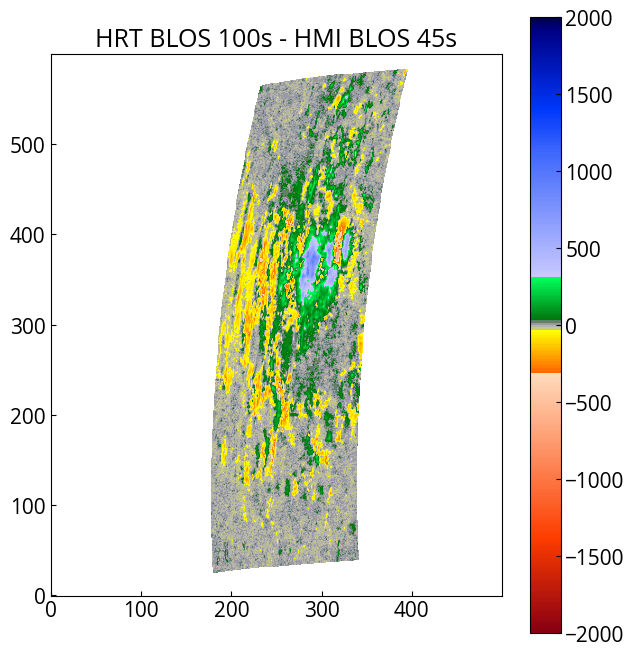

In [64]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(out[0].data[1950:2550,:500]-out[1].data[1950:2550,:500],origin="lower",cmap=magmap,vmin=-2000,vmax=2000)
plt.title('HRT BLOS 100s - HMI BLOS 45s')
plt.colorbar()
plt.show()

# Not sure about the alignment (earlier correction, maybe better to reproject the continuum image, take into account limb darkening, and see what correction factor I get)

## HRT Icnt and HMI 45s Ic

In [6]:
hrt_ic=hrt_dir+'solo_L2_phi-hrt-icnt_20231012T001503_V202408291137_0350120601.fits.gz'

In [8]:
hrt_icdata=fits.getdata(hrt_ic)

In [9]:
hmi_ic=hmi_ic_45_dir+'hmi.ic_45s.20231012_002145_TAI.2.continuum.fits'

In [77]:
hmi_icmap=sunpy.map.Map(hmi_ic).rotate()

In [78]:
hpc_coords_ic = sunpy.map.all_coordinates_from_map(hmi_icmap)

In [79]:
mask_ic = ~sunpy.map.coordinate_is_on_solar_disk(hpc_coords_ic)

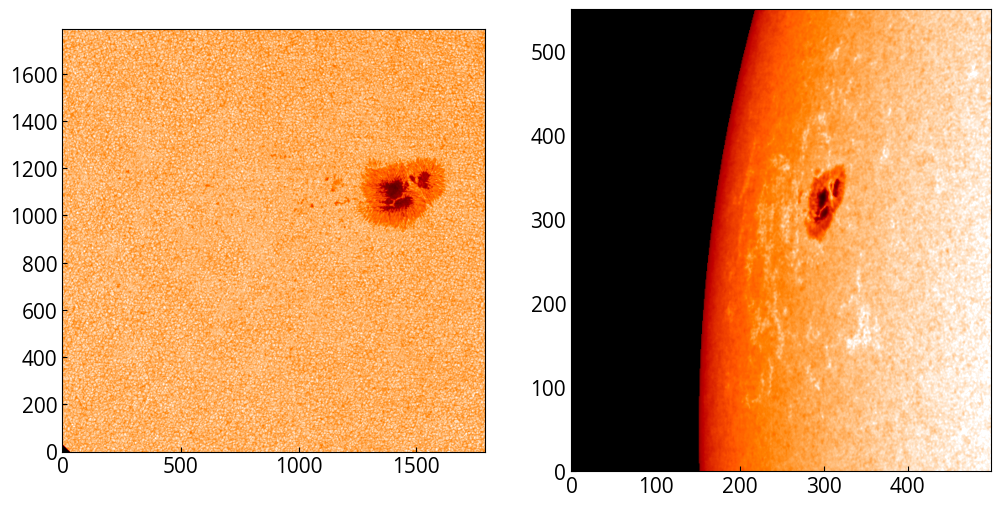

In [86]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(hrt_icdata,origin="lower",cmap='gist_heat',vmin=0,vmax=1.2)

plt.subplot(122)
hmi_icmap.data[np.isnan(hmi_icmap.data)]=0

norm=0.7*hmi_icmap.data[1000:3000,1000:3000].mean()

plt.imshow((hmi_icmap.data[2000:2550,:500]/norm)*~mask_ic[2000:2550,:500],origin="lower",cmap='gist_heat',vmin=0,vmax=1.2)
#plt.colorbar()

plt.show()

In [87]:
out = get_hmi_hrt_aligned(hrt_ic,hmi_ic)
#[np.int64(227), np.int64(-50)]

/data/solo/phi/data/fmdb/public/l2/2023-10-12/solo_L2_phi-hrt-icnt_20231012T001503_V202408291137_0350120601.fits.gz
/data/slam/sinjan/arlongterm_hmi/ic_45/hmi.ic_45s.20231012_002145_TAI.2.continuum.fits


[np.int64(226), np.int64(27)]
2024-09-25 12:42:13.354867
2024-09-25 12:42:59.816841


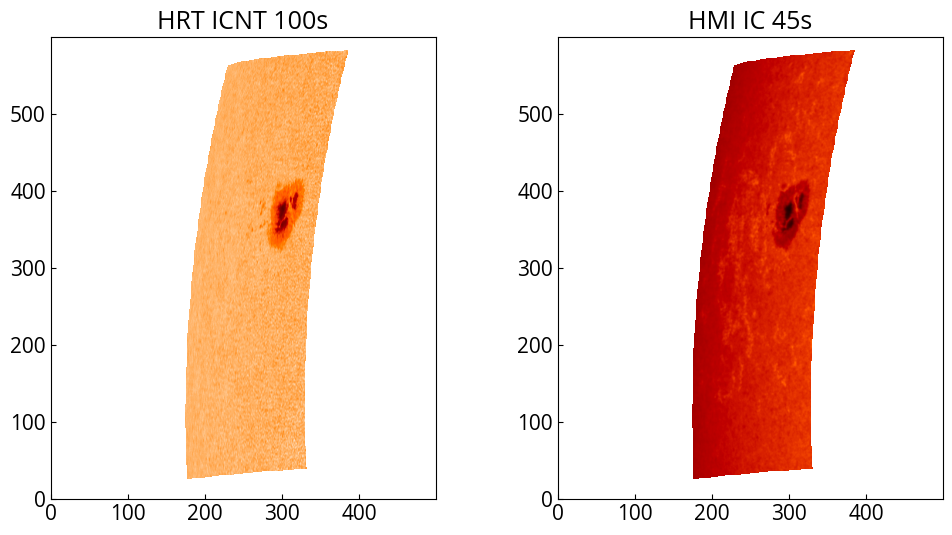

In [91]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(out[0].data[1950:2550,:500],origin="lower",cmap='gist_heat',vmin=0,vmax=1.2)
plt.title('HRT ICNT 100s')

plt.subplot(122)
out[1].data[np.isnan(out[0].data)]=np.nan
plt.imshow(out[1].data[1950:2550,:500]/(norm/0.7),origin="lower",cmap='gist_heat',vmin=0,vmax=1.2)
plt.title('HMI IC 45s')
#plt.colorbar()

plt.show()

In [89]:
with open(f"/data/slam/sinjan/arlongterm_pickles/20231012T001503_out_ic.pickle", "wb") as input_file:
    cPickle.dump(out,input_file)

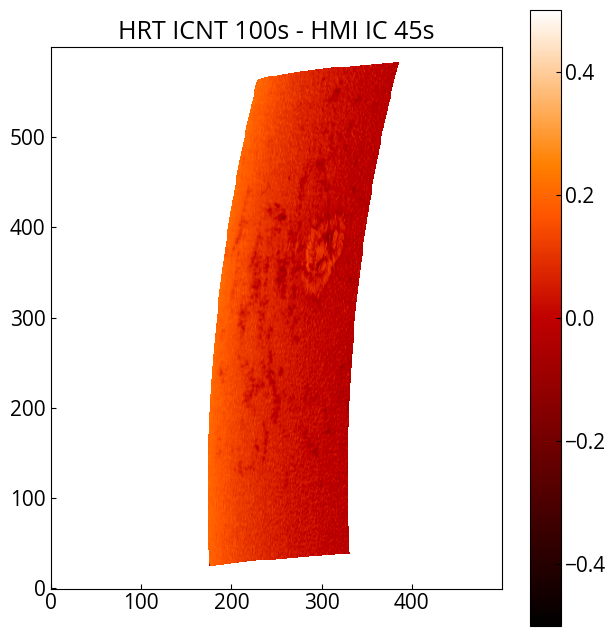

In [98]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(out[0].data[1950:2550,:500]*0.7-out[1].data[1950:2550,:500]/(norm/0.7),origin="lower",cmap='gist_heat',vmin=-0.5,vmax=0.5)
plt.title('HRT ICNT 100s - HMI IC 45s')
plt.colorbar()
plt.show()

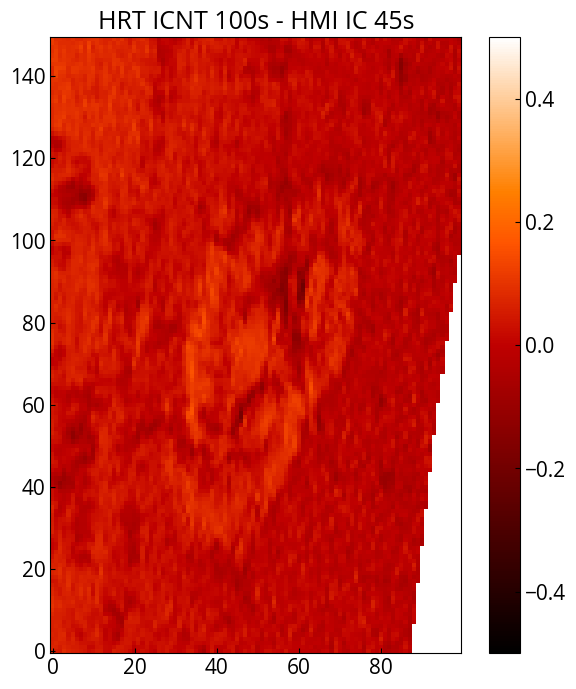

In [101]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(out[0].data[2250:2400,250:350]*0.7-out[1].data[2250:2400,250:350]/(norm/0.7),origin="lower",cmap='gist_heat',vmin=-0.5,vmax=0.5)
plt.title('HRT ICNT 100s - HMI IC 45s')
plt.colorbar()
plt.show()

# Redo Blos remapping using ICNT WCS err values

In [24]:
from datetime import datetime as dt 

In [29]:
test = dt.strptime('20231012T001503', '%Y%m%dT%H%M%S')
clean = test.strftime('%d-%m-%Y %H:%M:%S')
print(clean)

12-10-2023 00:15:03


In [10]:
#get better WCS err using continuum images
err_from_ic=get_hrt_wcs_err(hrt_ic,hmi_ic)

/data/solo/phi/data/fmdb/public/l2/2023-10-12/solo_L2_phi-hrt-icnt_20231012T001503_V202408291137_0350120601.fits.gz
/data/slam/sinjan/arlongterm_hmi/ic_45/hmi.ic_45s.20231012_002145_TAI.2.continuum.fits


[np.int64(226), np.int64(27)]


In [16]:
hrt_blos_redo_with_ic, hmi_outmap = get_hrt_remapped_R(hrt_file, hmi_file, err_from_ic)

2024-09-25 12:53:49.339525
2024-09-25 12:54:41.084780


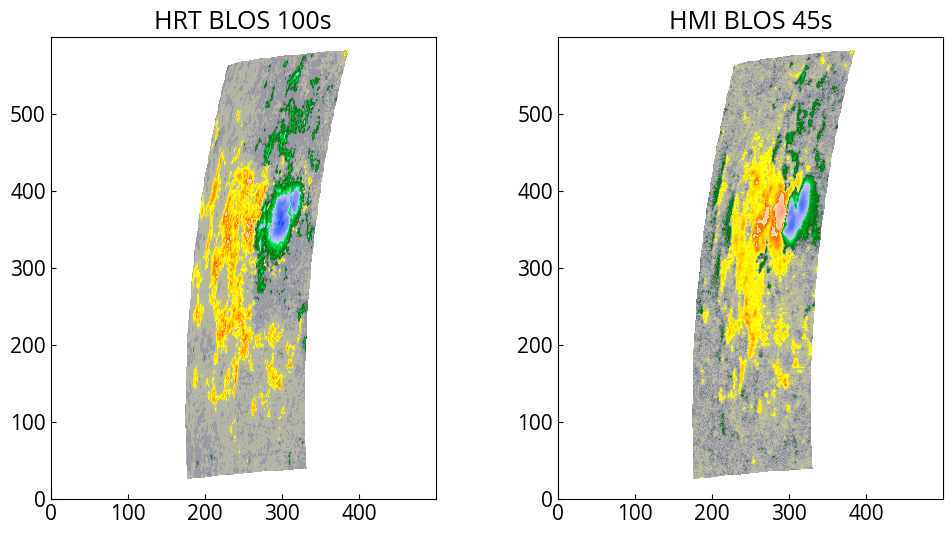

In [19]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(hrt_blos_redo_with_ic.data[1950:2550,:500],origin="lower",cmap=magmap,vmin=-2000,vmax=2000)
plt.title('HRT BLOS 100s')

plt.subplot(122)
hmi_outmap.data[np.isnan(hrt_blos_redo_with_ic.data)]=np.nan
plt.imshow(hmi_outmap.data[1950:2550,:500],origin="lower",cmap=magmap,vmin=-2000,vmax=2000)
plt.title('HMI BLOS 45s')
#plt.colorbar()

plt.show()

In [22]:
with open(f"/data/slam/sinjan/arlongterm_pickles/20231012T001503_out_blos_redo_with_ic.pickle", "wb") as input_file:
    cPickle.dump([hrt_blos_redo_with_ic,hmi_outmap],input_file)

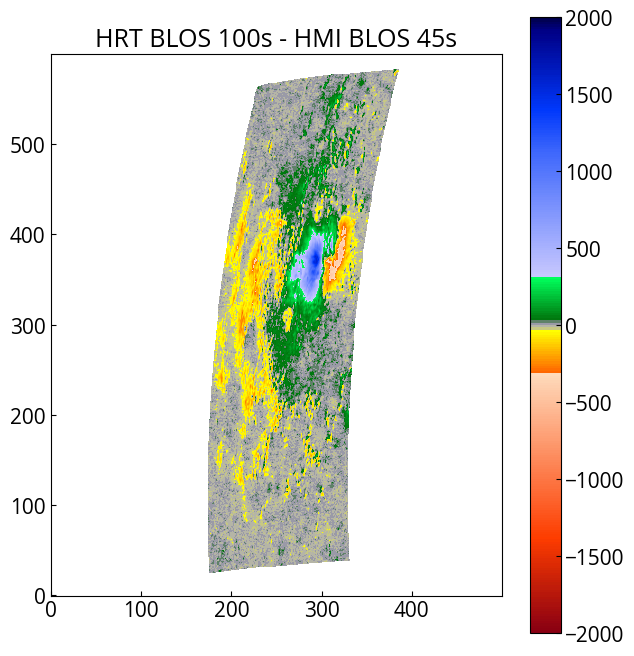

In [23]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(hrt_blos_redo_with_ic.data[1950:2550,:500]-hmi_outmap.data[1950:2550,:500],origin="lower",cmap=magmap,vmin=-2000,vmax=2000)
plt.title('HRT BLOS 100s - HMI BLOS 45s')
plt.colorbar()
plt.show()

In [3]:
with open(f"/data/slam/sinjan/arlongterm_pickles/20231012T001503_out_blos_redo_with_ic.pickle", "rb") as input_file:
    [hrt_blos_rmap,hmi_out]=cPickle.load(input_file)

In [5]:
hrt_blos_rmap.meta['DATE']

'2023-10-16T09:22:46.000'